In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
# Cargar los datos desde el archivo Excel
data = pd.read_csv('DATOS_variacion.csv')

# Mostrar las primeras filas del DataFrame
data.head()
#print(f"Cantidad de filas originales: {len(data)}")

,Fecha,Hora,T1,T2,T3,T4,T5,T6,T7,T8,...,mL,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,16/10/2025,13:29:41,25.81,9.13,22.62,17.25,21.37,21.75,21.62,22.62,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/10/2025,13:29:43,25.81,9.13,22.69,17.12,21.44,21.56,21.62,22.62,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/10/2025,13:29:45,25.87,9.13,22.75,17.00,21.37,21.56,21.62,22.62,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/10/2025,13:29:47,25.94,9.13,22.81,16.94,21.37,21.56,21.62,22.56,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/10/2025,13:29:49,25.94,9.13,22.81,16.94,21.37,21.62,21.62,22.62,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prepocesamiento

In [2]:

data.drop(['Fecha','Hora','mL',"Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22",
           "Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"], axis=1, inplace=True)

In [3]:
print(f"Cantidad de filas originales: {len(data)}")

Cantidad de filas originales: 7016


In [4]:
# Renombrar las columnas
data.rename(columns={"T1": "Temperatura (°C) celda 1 lado caliente", "T2": "Temperatura (°C) celda 1 lado frio", 
                     "T3": "Temperatura (°C) celda 2 lado caliente", "T4": "Temperatura (°C) celda 2 lado frio",
                     "T5": "Temperatura (°C) celda 3 lado caliente", "T6": "Temperatura (°C) celda 3 lado frio",
                     "T7": "Temperatura (°C) celda 4 lado caliente", "T8": "Temperatura (°C) celda 4 lado frio",
                     "PuntoRocioC1": "Punto de rocio celda 1 (°C)", "PuntoRocioC2": "Punto de rocio celda 2 (°C)",
                     "PuntoRocioC3": "Punto de rocio celda 3 (°C)", "PuntoRocioC4": "Punto de rocio celda 4 (°C)"
                       }, inplace=True)  

In [5]:
data.head()

,Temperatura (°C) celda 1 lado caliente,Temperatura (°C) celda 1 lado frio,Temperatura (°C) celda 2 lado caliente,Temperatura (°C) celda 2 lado frio,Temperatura (°C) celda 3 lado caliente,Temperatura (°C) celda 3 lado frio,Temperatura (°C) celda 4 lado caliente,Temperatura (°C) celda 4 lado frio,Humedad,TempAmbiente,PuntoRocioGeneral,Punto de rocio celda 1 (°C),Punto de rocio celda 2 (°C),Punto de rocio celda 3 (°C),Punto de rocio celda 4 (°C),Gotas
0,25.81,9.13,22.62,17.25,21.37,21.75,21.62,22.62,64.4,21.3,14.31,18.58,15.56,14.38,14.62,0.0
1,25.81,9.13,22.69,17.12,21.44,21.56,21.62,22.62,64.4,21.3,14.31,18.58,15.62,14.44,14.62,0.0
2,25.87,9.13,22.75,17.00,21.37,21.56,21.62,22.62,64.3,21.3,14.28,18.62,15.66,14.35,14.59,0.0
3,25.94,9.13,22.81,16.94,21.37,21.56,21.62,22.56,64.3,21.3,14.28,18.68,15.72,14.35,14.59,0.0
4,25.94,9.13,22.81,16.94,21.37,21.62,21.62,22.62,64.3,21.3,14.28,18.68,15.72,14.35,14.59,0.0


In [6]:
print(data.dtypes)

Temperatura (°C) celda 1 lado caliente    float64
Temperatura (°C) celda 1 lado frio        float64
Temperatura (°C) celda 2 lado caliente    float64
Temperatura (°C) celda 2 lado frio        float64
Temperatura (°C) celda 3 lado caliente    float64
Temperatura (°C) celda 3 lado frio        float64
Temperatura (°C) celda 4 lado caliente    float64
Temperatura (°C) celda 4 lado frio        float64
Humedad                                   float64
TempAmbiente                              float64
PuntoRocioGeneral                         float64
Punto de rocio celda 1 (°C)               float64
Punto de rocio celda 2 (°C)               float64
Punto de rocio celda 3 (°C)               float64
Punto de rocio celda 4 (°C)               float64
Gotas                                     float64
dtype: object


In [7]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


print("Tipos de datos después de convertir:")
print(data.dtypes)
columnas_object = data.select_dtypes(include=['object']).columns
if len(columnas_object) > 0:
    print("Estas columnas no se pudieron convertir y siguen como 'object':")
    print(columnas_object.tolist())
else:
    print("Todas las columnas fueron convertidas a valores numéricos.")

Tipos de datos después de convertir:
Temperatura (°C) celda 1 lado caliente    float64
Temperatura (°C) celda 1 lado frio        float64
Temperatura (°C) celda 2 lado caliente    float64
Temperatura (°C) celda 2 lado frio        float64
Temperatura (°C) celda 3 lado caliente    float64
Temperatura (°C) celda 3 lado frio        float64
Temperatura (°C) celda 4 lado caliente    float64
Temperatura (°C) celda 4 lado frio        float64
Humedad                                   float64
TempAmbiente                              float64
PuntoRocioGeneral                         float64
Punto de rocio celda 1 (°C)               float64
Punto de rocio celda 2 (°C)               float64
Punto de rocio celda 3 (°C)               float64
Punto de rocio celda 4 (°C)               float64
Gotas                                     float64
dtype: object
Todas las columnas fueron convertidas a valores numéricos.


In [8]:
data = data.dropna()

In [9]:
# Binariza solo los valores no nulos
data['Gotas'] = data['Gotas'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else np.nan))

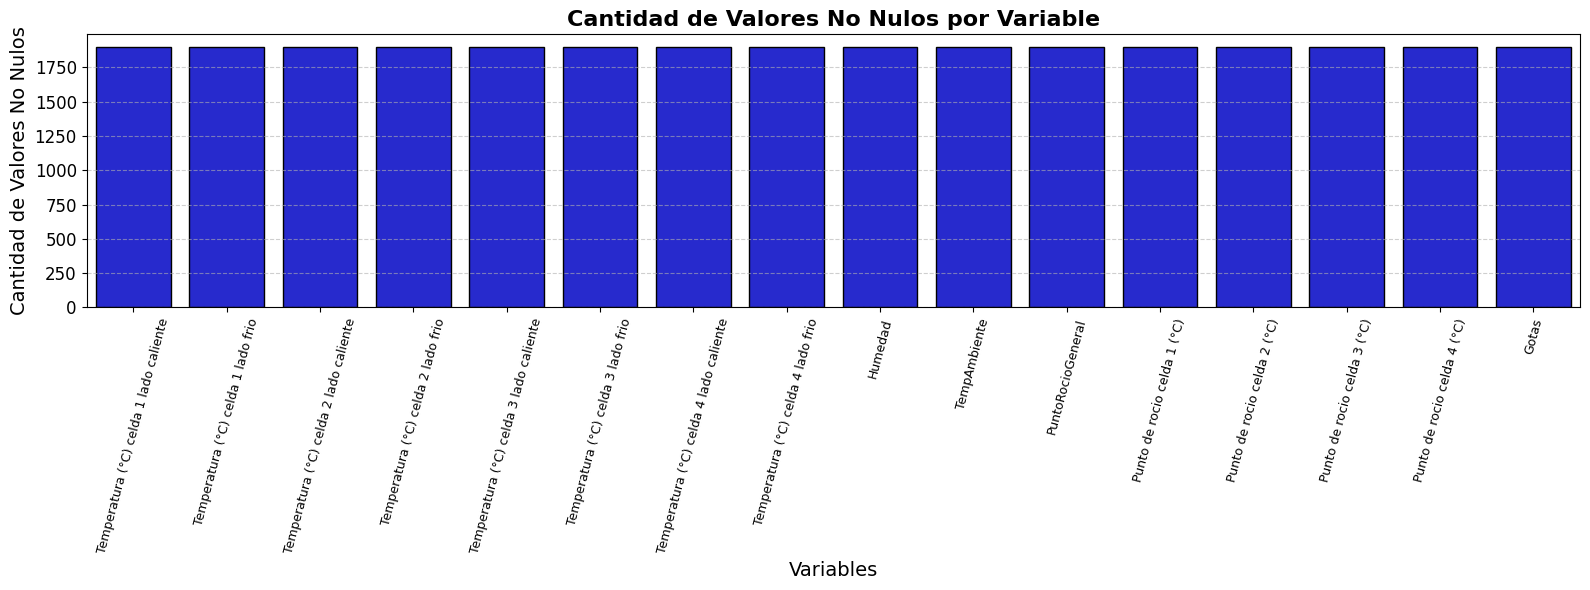

In [10]:
# Contando valores no nulos por cada variable
conteo = data.count()

# Creando un gráfico de barras con ajustes visuales
plt.figure(figsize=(16, 6))  # más ancho para evitar amontonamiento
sns.barplot(x=conteo.index, y=conteo.values, color="#0b0fe9", edgecolor='black')

plt.title('Cantidad de Valores No Nulos por Variable', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Cantidad de Valores No Nulos', fontsize=14)
plt.xticks(rotation=75, fontsize=9)  # rotación y tamaño reducido
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Columnas numéricas detectadas: ['Temperatura (°C) celda 1 lado caliente', 'Temperatura (°C) celda 1 lado frio', 'Temperatura (°C) celda 2 lado caliente', 'Temperatura (°C) celda 2 lado frio', 'Temperatura (°C) celda 3 lado caliente', 'Temperatura (°C) celda 3 lado frio', 'Temperatura (°C) celda 4 lado caliente', 'Temperatura (°C) celda 4 lado frio', 'Humedad', 'TempAmbiente', 'PuntoRocioGeneral', 'Punto de rocio celda 1 (°C)', 'Punto de rocio celda 2 (°C)', 'Punto de rocio celda 3 (°C)', 'Punto de rocio celda 4 (°C)', 'Gotas']


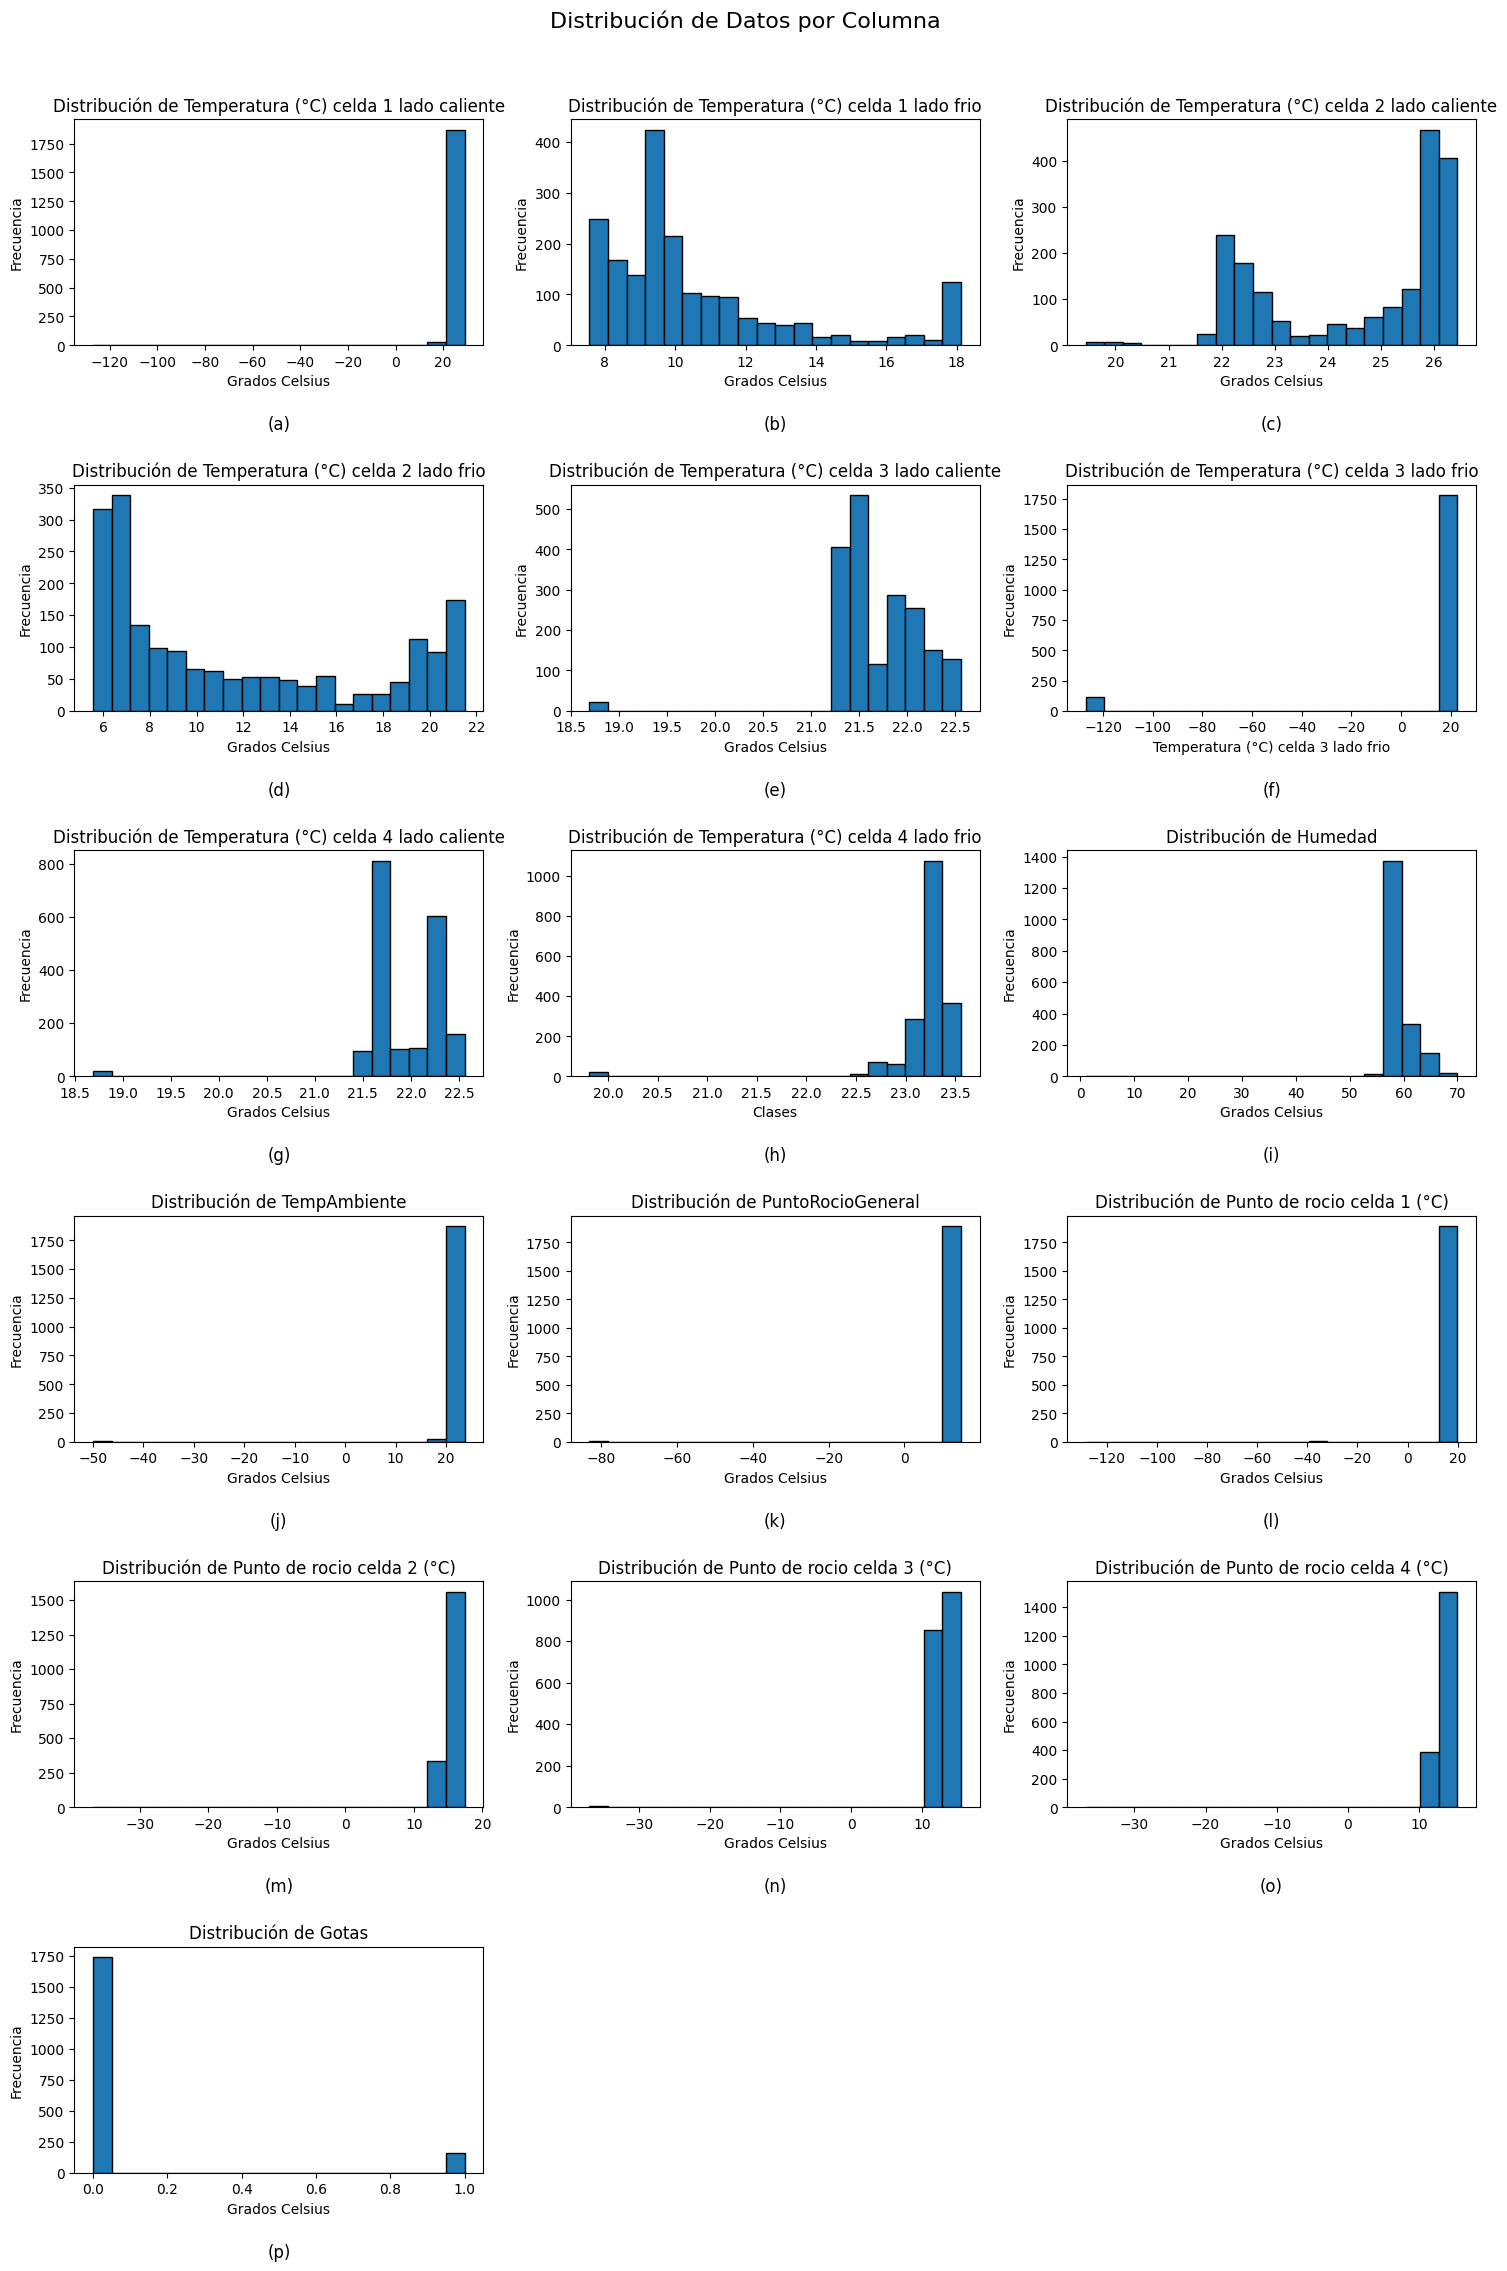

In [11]:
columnas_numericas = data.select_dtypes(include=['number']).columns
print(f"Columnas numéricas detectadas: {columnas_numericas.tolist()}")

# Si no hay columnas numéricas, se detiene
if len(columnas_numericas) == 0:
    print("No hay columnas numéricas para graficar.")
else:
    ncols = 3
    nrows = (len(columnas_numericas) + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()
    letras = list(string.ascii_lowercase)

    for i, col in enumerate(columnas_numericas):
        datos = data[col].dropna()
        axes[i].hist(datos, bins=20, edgecolor='black')
        axes[i].set_title(f'Distribución de {col}')

        inciso = letras[i] if i < len(letras) else f"{i+1}"
        if inciso == 'f':
            axes[i].set_xlabel(col)
        elif inciso == 'h':
            axes[i].set_xlabel('Clases')
        else:
            axes[i].set_xlabel('Grados Celsius')

        axes[i].set_ylabel('Frecuencia')
        axes[i].text(0.5, -0.35, f'({inciso})', transform=axes[i].transAxes,
                     ha='center', va='center', fontsize=12)

    # Oculta los ejes vacíos
    for j in range(len(columnas_numericas), len(axes)):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle('Distribución de Datos por Columna', fontsize=16)
    plt.show()

In [12]:
# Verificar existencia de la columna
columna_objetivo = "Temperatura (°C) celda 3 lado frio"
if columna_objetivo not in data.columns:
    raise KeyError(f"La columna '{columna_objetivo}' no existe en el DataFrame.")

# Eliminar nulos y calcular IQR
datos = data[columna_objetivo].dropna()
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores dentro del rango aceptable
filtro = (data[columna_objetivo] >= Q1 - 1.5 * IQR) & (data[columna_objetivo] <= Q3 + 1.5 * IQR)
data_filtrada = data[filtro].copy()

print(f"Filas originales: {len(data)}")
print(f"Filas después de eliminar atípicos en '{columna_objetivo}': {len(data_filtrada)}")

Filas originales: 1896
Filas después de eliminar atípicos en 'Temperatura (°C) celda 3 lado frio': 1708


In [13]:
original_var = data[columnas_numericas].var()


print("Varianza original por columna:")
for col in columnas_numericas:
    print(f"{col}: {original_var[col]:.4f}")


Varianza original por columna:
Temperatura (°C) celda 1 lado caliente: 17.1111
Temperatura (°C) celda 1 lado frio: 7.7286
Temperatura (°C) celda 2 lado caliente: 3.0002
Temperatura (°C) celda 2 lado frio: 31.1285
Temperatura (°C) celda 3 lado caliente: 0.2197
Temperatura (°C) celda 3 lado frio: 1300.8296
Temperatura (°C) celda 4 lado caliente: 0.2122
Temperatura (°C) celda 4 lado frio: 0.1548
Humedad: 14.1104
TempAmbiente: 11.8830
PuntoRocioGeneral: 20.1062
Punto de rocio celda 1 (°C): 19.9222
Punto de rocio celda 2 (°C): 6.9747
Punto de rocio celda 3 (°C): 5.9299
Punto de rocio celda 4 (°C): 5.8891
Gotas: 0.0760


In [14]:
filtrada_var = data_filtrada[columnas_numericas].var()


print("Varianza por columna:")
for col in columnas_numericas:
    print(f"{col}: {filtrada_var[col]:.4f}")

Varianza por columna:
Temperatura (°C) celda 1 lado caliente: 16.4701
Temperatura (°C) celda 1 lado frio: 4.2352
Temperatura (°C) celda 2 lado caliente: 2.4513
Temperatura (°C) celda 2 lado frio: 26.0253
Temperatura (°C) celda 3 lado caliente: 0.1010
Temperatura (°C) celda 3 lado frio: 0.0394
Temperatura (°C) celda 4 lado caliente: 0.0835
Temperatura (°C) celda 4 lado frio: 0.0269
Humedad: 8.6863
TempAmbiente: 6.6641
PuntoRocioGeneral: 11.1741
Punto de rocio celda 1 (°C): 17.2098
Punto de rocio celda 2 (°C): 4.2544
Punto de rocio celda 3 (°C): 3.4991
Punto de rocio celda 4 (°C): 3.4574
Gotas: 0.0649


In [15]:
# ver datos faltantes
faltantes= data.isnull().sum()
print(faltantes)

Temperatura (°C) celda 1 lado caliente    0
Temperatura (°C) celda 1 lado frio        0
Temperatura (°C) celda 2 lado caliente    0
Temperatura (°C) celda 2 lado frio        0
Temperatura (°C) celda 3 lado caliente    0
Temperatura (°C) celda 3 lado frio        0
Temperatura (°C) celda 4 lado caliente    0
Temperatura (°C) celda 4 lado frio        0
Humedad                                   0
TempAmbiente                              0
PuntoRocioGeneral                         0
Punto de rocio celda 1 (°C)               0
Punto de rocio celda 2 (°C)               0
Punto de rocio celda 3 (°C)               0
Punto de rocio celda 4 (°C)               0
Gotas                                     0
dtype: int64


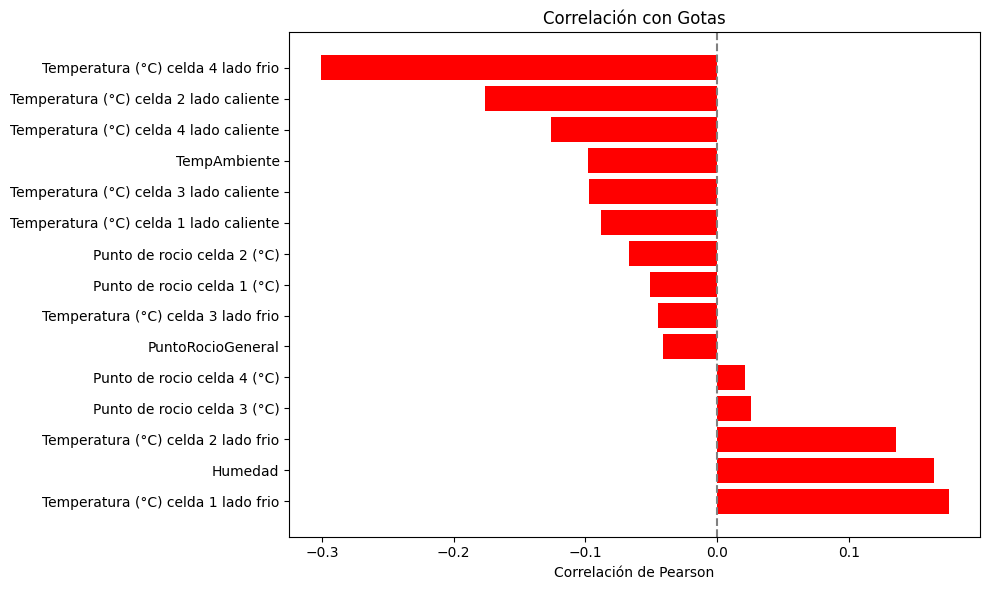

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Columna objetivo
target_col = "Gotas"

# Verificar existencia de la columna objetivo
if target_col not in data.columns:
    raise KeyError(f"No se encuentra la columna de destino: {target_col}")

# Copia y conversión a numérico
data_num = data.copy()
data_num[target_col] = pd.to_numeric(data_num[target_col], errors="coerce")

# Seleccionar columnas numéricas
num = data_num.select_dtypes(include=[np.number])

# Matriz de correlaciones
corr = num.corr()

# Extraer correlaciones con la variable objetivo, excluyéndola de las filas
corr_series = corr[target_col].drop(labels=[target_col], errors="ignore").dropna().sort_values()

# Gráfico único
plt.figure(figsize=(10, 6))
plt.barh(corr_series.index, corr_series.values, color="red")
plt.title(f"Correlación con {target_col}")
plt.xlabel("Correlación de Pearson")
plt.axvline(0, color="gray", linestyle="--")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Separar los datos para prueba y entrenamiento 

In [17]:
data['Gotas'] = (data['Gotas'] > 0).astype(int)

# Paso 2: Separar X e y, excluyendo 'PuntoRocioGeneral'
X = data.drop(columns=['Gotas', 'Punto de rocio celda 3 (°C)',"Punto de rocio celda 4 (°C)","Temperatura (°C) celda 4 lado frio"]).select_dtypes(include=[np.number]).copy()
y = data['Gotas']


# Paso 4: Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Escalar los datos 

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Equilibrar calses 

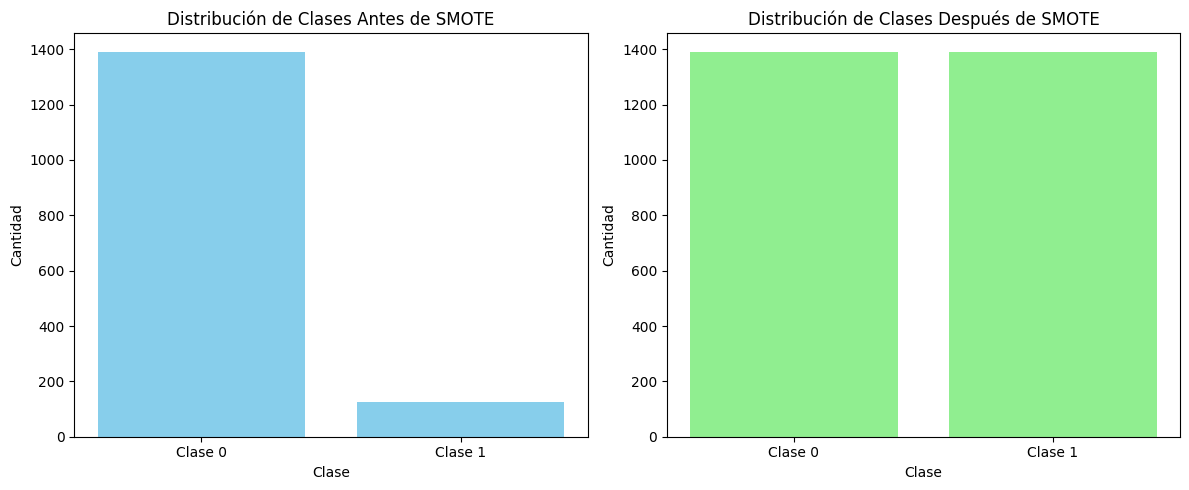

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Conteo antes y después del resampling
original_counts = Counter(y_train)
resampled_counts = Counter(y_train_resampled)

# Gráfico comparativo
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Etiquetas personalizadas
labels = ['Clase 0', 'Clase 1']

# Antes del SMOTE
ax[0].bar(labels, [original_counts[0], original_counts[1]], color='skyblue')
ax[0].set_title('Distribución de Clases Antes de SMOTE')
ax[0].set_xlabel('Clase')
ax[0].set_ylabel('Cantidad')

# Después del SMOTE
ax[1].bar(labels, [resampled_counts[0], resampled_counts[1]], color='lightgreen')
ax[1].set_title('Distribución de Clases Después de SMOTE')
ax[1].set_xlabel('Clase')
ax[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

Entrenamiento con regresion logistica 

In [20]:
#Entrenar regresión logística
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train_resampled, y_train_resampled)


y_pred = modelo_log.predict(X_test_scaled)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")


 Matriz de confusión:
[[230 119]
 [  7  24]]

 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.66      0.78       349
           1       0.17      0.77      0.28        31

    accuracy                           0.67       380
   macro avg       0.57      0.72      0.53       380
weighted avg       0.90      0.67      0.74       380


 Accuracy: 0.6684


Validacion Cruzada 

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import numpy as np

# Configurar validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar listas para métricas
acc_list, prec_list, rec_list, f1_list = [], [], [], []

# Iterar por cada fold
for train_index, test_index in skf.split(X_train_scaled, y_train):
    X_fold_train, X_fold_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]


    # Predicciones
    y_pred = modelo_log.predict(X_fold_test)

    # Métricas
    acc_list.append(accuracy_score(y_fold_test, y_pred))
    prec_list.append(precision_score(y_fold_test, y_pred))
    rec_list.append(recall_score(y_fold_test, y_pred))
    f1_list.append(f1_score(y_fold_test, y_pred))

# Mostrar resultados promedio
print(f"Accuracy promedio: {np.mean(acc_list):.4f}")
print(f"Precision promedio: {np.mean(prec_list):.4f}")
print(f"Recall promedio: {np.mean(rec_list):.4f}")
print(f"F1-score promedio: {np.mean(f1_list):.4f}")

Accuracy promedio: 0.6405
Precision promedio: 0.1539
Recall promedio: 0.7385
F1-score promedio: 0.2547


Matriz de confusion 

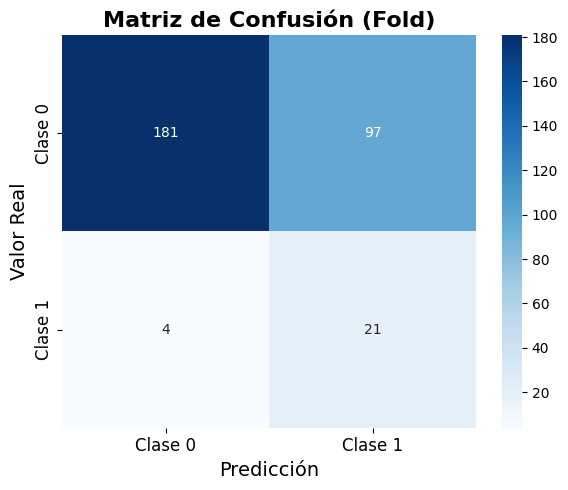

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dentro del loop de validación cruzada
matriz = confusion_matrix(y_fold_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión (Fold)', fontsize=16, fontweight='bold')
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Valor Real', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

Redes Neuronal

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


# Definir arquitectura de la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo
history = model.fit(X_train_resampled, y_train_resampled,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluar en conjunto de prueba
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred_class = (y_pred_prob >= 0.5).astype(int)

print("\n Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_class))

print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred_class))

print(f"\n Accuracy: {accuracy_score(y_test, y_pred_class):.4f}")

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6470 - loss: 0.6825 - val_accuracy: 0.5144 - val_loss: 0.8705
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.6346 - val_accuracy: 0.4766 - val_loss: 0.8511
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.6151 - val_accuracy: 0.5342 - val_loss: 0.8167
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.6037 - val_accuracy: 0.5378 - val_loss: 0.8105
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5981 - val_accuracy: 0.4640 - val_loss: 0.8693
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.5854 - val_accuracy: 0.4730 - val_loss: 0.8305
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5850 - val_accuracy: 0.6097 - val_loss: 0.7625
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.5724 - val_accuracy: 0.4766 - v

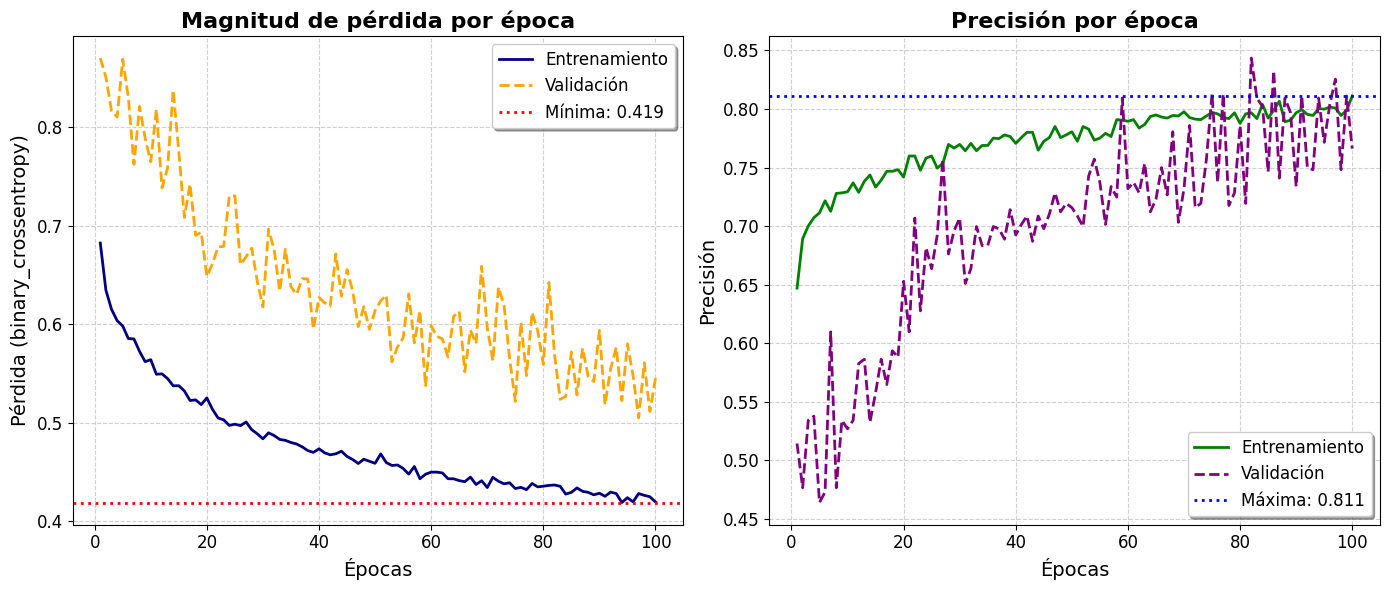

In [24]:
import matplotlib.pyplot as plt

# Extraer historial
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 6))  # Tamaño más compacto y profesional

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, color='navy', linewidth=2, label='Entrenamiento')
plt.plot(epochs, val_loss, color='orange', linewidth=2, linestyle='--', label='Validación')

# Línea horizontal de pérdida mínima
min_loss = min(loss)
plt.axhline(y=min_loss, color='red', linestyle=':', linewidth=2, label=f'Mínima: {min_loss:.3f}')

plt.title('Magnitud de pérdida por época', fontsize=16, fontweight='bold')
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Pérdida (binary_crossentropy)", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='best', frameon=True, shadow=True)

#  Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, color='green', linewidth=2, label='Entrenamiento')
plt.plot(epochs, val_acc, color='purple', linewidth=2, linestyle='--', label='Validación')

# Línea horizontal de precisión máxima
max_acc = max(acc)
plt.axhline(y=max_acc, color='blue', linestyle=':', linewidth=2, label=f'Máxima: {max_acc:.3f}')

plt.title('Precisión por época', fontsize=16, fontweight='bold')
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Precisión", fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='best', frameon=True, shadow=True)

plt.tight_layout()
plt.show()

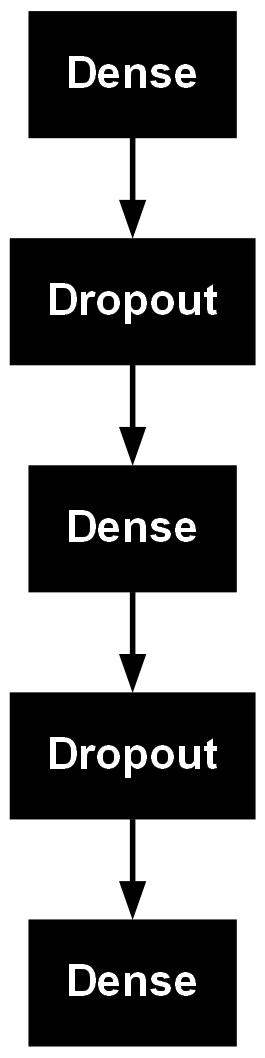

In [25]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='arquitectura_modelo.png')

Validacion Cruzada 


🔍 Fold 1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8191 | Precision: 0.2698 | Recall: 0.6538 | F1: 0.3820


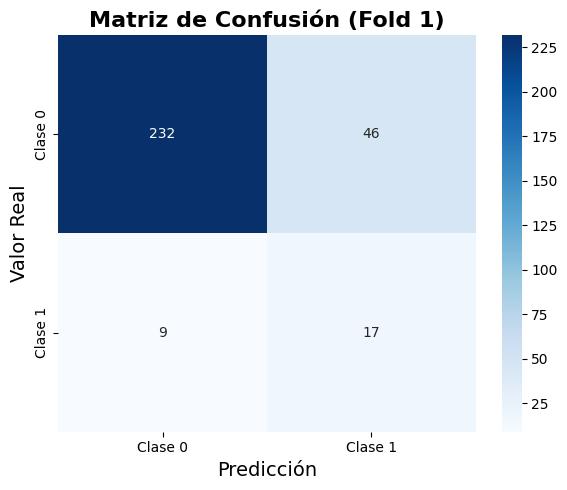


🔍 Fold 2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8284 | Precision: 0.2985 | Recall: 0.8000 | F1: 0.4348


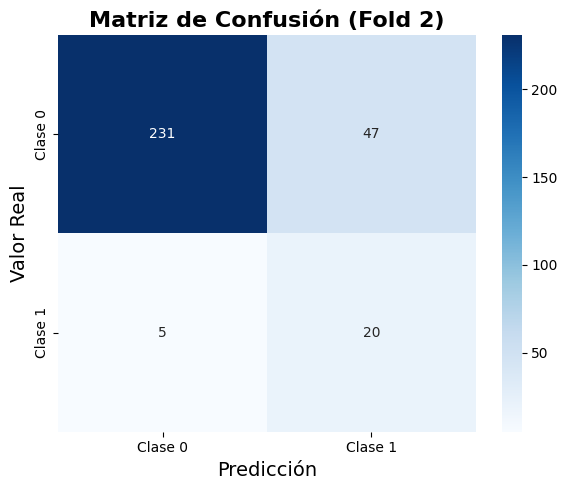


🔍 Fold 3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8119 | Precision: 0.2895 | Recall: 0.8800 | F1: 0.4356


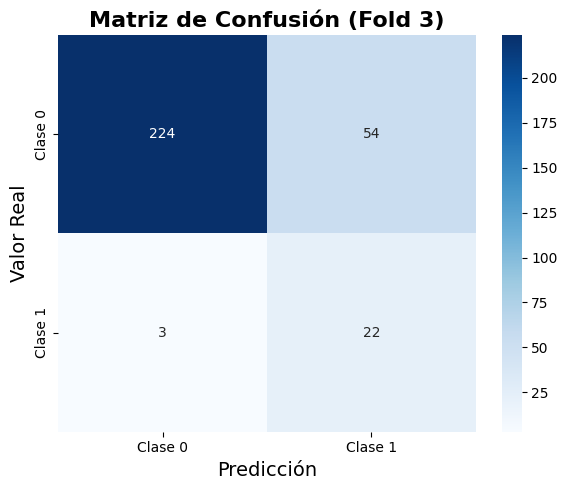


🔍 Fold 4
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8284 | Precision: 0.2632 | Recall: 0.6000 | F1: 0.3659


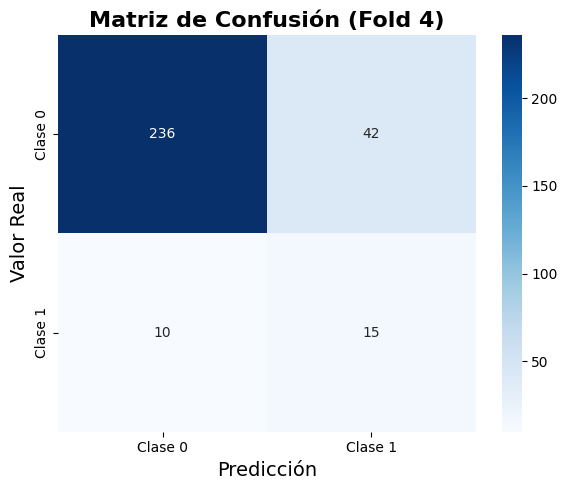


🔍 Fold 5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8251 | Precision: 0.2941 | Recall: 0.8000 | F1: 0.4301


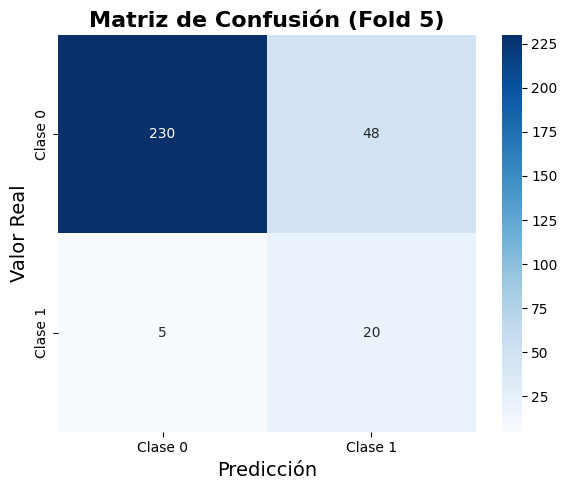


 Evaluación global del modelo ya entrenado:
Accuracy promedio:  0.8226
Precision promedio: 0.2830
Recall promedio:    0.7468
F1-score promedio:  0.4097


In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que X y y estén alineados
X_alineado = X_train_scaled  # debe ser un array o DataFrame ya escalado
y_alineado = y_train.reset_index(drop=True)  # asegúrate de que coincidan en longitud

# Validación cruzada sin reentrenar
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_list, prec_list, rec_list, f1_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_alineado, y_alineado)):
    print(f"\n🔍 Fold {fold+1}")

    X_val_fold = X_alineado[val_idx]
    y_val_fold = y_alineado.iloc[val_idx]

    # Predicción con el modelo ya entrenado
    y_pred_prob = model.predict(X_val_fold).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Métricas
    acc = accuracy_score(y_val_fold, y_pred)
    prec = precision_score(y_val_fold, y_pred)
    rec = recall_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

    # Matriz de confusión
    matriz = confusion_matrix(y_val_fold, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Clase 0', 'Clase 1'],
                yticklabels=['Clase 0', 'Clase 1'])
    plt.title(f'Matriz de Confusión (Fold {fold+1})', fontsize=16, fontweight='bold')
    plt.xlabel('Predicción', fontsize=14)
    plt.ylabel('Valor Real', fontsize=14)
    plt.tight_layout()
    plt.show()

# Resultados promedio
print("\n Evaluación global del modelo ya entrenado:")
print(f"Accuracy promedio:  {np.mean(acc_list):.4f}")
print(f"Precision promedio: {np.mean(prec_list):.4f}")
print(f"Recall promedio:    {np.mean(rec_list):.4f}")
print(f"F1-score promedio:  {np.mean(f1_list):.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


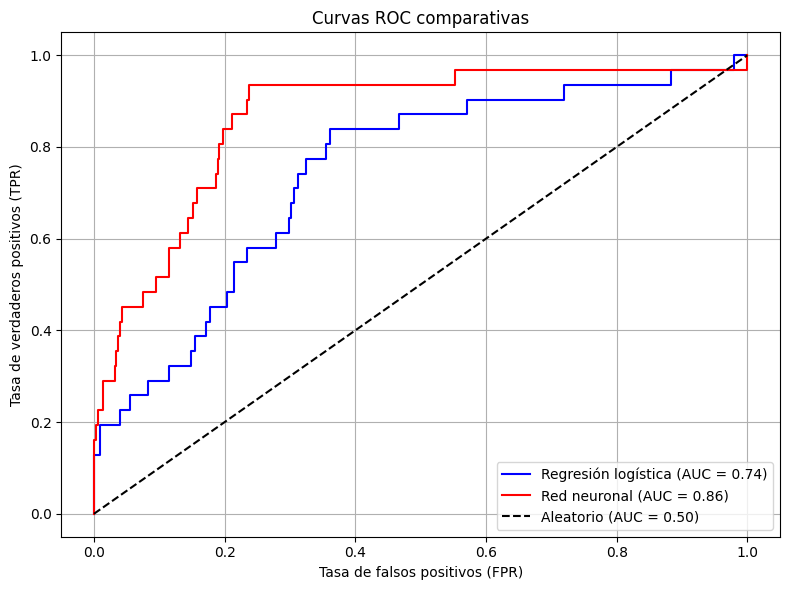

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Probabilidades de cada modelo ---
y_log_prob = modelo_log.predict_proba(X_test_scaled)[:, 1]           # Regresión logística
y_nn_prob = model.predict(X_test_scaled).flatten()                # Red neuronal

# --- Curvas ROC ---
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_prob)
auc_log = auc(fpr_log, tpr_log)


fpr_nn, tpr_nn, _ = roc_curve(y_test, y_nn_prob)
auc_nn = auc(fpr_nn, tpr_nn)

# --- Gráfico ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Regresión logística (AUC = {auc_log:.2f})", color='blue')

plt.plot(fpr_nn, tpr_nn, label=f"Red neuronal (AUC = {auc_nn:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)')

plt.title("Curvas ROC comparativas")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Formula de salida para microcontrolador

In [28]:
# Extraer pesos y sesgo de la última capa (capa de salida)
output_weights, output_bias = model.layers[-1].get_weights()

print("\nPesos de la capa de salida:")
print(output_weights.flatten())

print("\nSesgo (bias) de la capa de salida:")
print(output_bias)


Pesos de la capa de salida:
[-1.5287551  -1.6061023   1.1113143   1.0782777   0.54680383 -1.333685
 -0.90707195  0.6035224  -1.1874975  -0.90622485  0.3688585   0.65401614
  0.5113594   0.71844137  0.79526764  1.6395668   0.41946703 -0.9754916
  0.9035983   0.34674403 -1.1149888  -1.3767345  -1.4762865  -1.6088147
  1.0828234  -1.7263663   1.0727419  -0.944882    0.3368746  -1.064889
  0.74611807 -1.3096243 ]

Sesgo (bias) de la capa de salida:
[-0.07440013]


In [29]:
float z = 0.0;
for (int i = 0; i < n; i++) {
    z += w[i] * x[i];
}
z += b;
float y = 1.0 / (1.0 + exp(-z));

SyntaxError: invalid syntax (1602395138.py, line 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


  1%|          | 1/100 [00:00<00:50,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


  2%|▏         | 2/100 [00:01<00:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


  3%|▎         | 3/100 [00:01<00:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step


  4%|▍         | 4/100 [00:02<00:47,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


  5%|▌         | 5/100 [00:02<00:47,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


  6%|▌         | 6/100 [00:03<00:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


  7%|▋         | 7/100 [00:03<00:45,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


  8%|▊         | 8/100 [00:04<00:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


  9%|▉         | 9/100 [00:04<00:47,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step


 10%|█         | 10/100 [00:05<00:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


 11%|█         | 11/100 [00:05<00:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


 12%|█▏        | 12/100 [00:06<00:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


 13%|█▎        | 13/100 [00:06<00:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step


 14%|█▍        | 14/100 [00:07<00:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step


 15%|█▌        | 15/100 [00:07<00:42,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


 16%|█▌        | 16/100 [00:08<00:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step


 17%|█▋        | 17/100 [00:08<00:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step


 18%|█▊        | 18/100 [00:09<00:40,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


 19%|█▉        | 19/100 [00:09<00:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


 20%|██        | 20/100 [00:10<00:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


 21%|██        | 21/100 [00:10<00:39,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


 22%|██▏       | 22/100 [00:11<00:38,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


 23%|██▎       | 23/100 [00:11<00:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


 24%|██▍       | 24/100 [00:12<00:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


 25%|██▌       | 25/100 [00:12<00:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


 26%|██▌       | 26/100 [00:13<00:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


 27%|██▋       | 27/100 [00:13<00:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


 28%|██▊       | 28/100 [00:14<00:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 29%|██▉       | 29/100 [00:14<00:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


 30%|███       | 30/100 [00:15<00:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


 31%|███       | 31/100 [00:15<00:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


 32%|███▏      | 32/100 [00:16<00:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


 33%|███▎      | 33/100 [00:17<00:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


 34%|███▍      | 34/100 [00:17<00:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


 35%|███▌      | 35/100 [00:18<00:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


 36%|███▌      | 36/100 [00:18<00:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


 37%|███▋      | 37/100 [00:19<00:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


 38%|███▊      | 38/100 [00:20<00:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


 39%|███▉      | 39/100 [00:20<00:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


 40%|████      | 40/100 [00:21<00:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


 41%|████      | 41/100 [00:21<00:33,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step


 42%|████▏     | 42/100 [00:22<00:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


 43%|████▎     | 43/100 [00:22<00:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


 44%|████▍     | 44/100 [00:23<00:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


 45%|████▌     | 45/100 [00:24<00:31,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


 46%|████▌     | 46/100 [00:24<00:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


 47%|████▋     | 47/100 [00:25<00:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


 48%|████▊     | 48/100 [00:25<00:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


 49%|████▉     | 49/100 [00:26<00:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


 50%|█████     | 50/100 [00:26<00:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


 51%|█████     | 51/100 [00:27<00:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


 52%|█████▏    | 52/100 [00:28<00:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


 53%|█████▎    | 53/100 [00:28<00:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


 54%|█████▍    | 54/100 [00:29<00:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


 55%|█████▌    | 55/100 [00:29<00:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


 56%|█████▌    | 56/100 [00:30<00:25,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


 57%|█████▋    | 57/100 [00:30<00:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step


 58%|█████▊    | 58/100 [00:31<00:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


 59%|█████▉    | 59/100 [00:32<00:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


 60%|██████    | 60/100 [00:32<00:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


 61%|██████    | 61/100 [00:33<00:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step


 62%|██████▏   | 62/100 [00:33<00:19,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


 63%|██████▎   | 63/100 [00:34<00:18,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


 64%|██████▍   | 64/100 [00:34<00:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step


 65%|██████▌   | 65/100 [00:35<00:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


 66%|██████▌   | 66/100 [00:35<00:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


 67%|██████▋   | 67/100 [00:36<00:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


 68%|██████▊   | 68/100 [00:36<00:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


 69%|██████▉   | 69/100 [00:37<00:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


 70%|███████   | 70/100 [00:37<00:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


 71%|███████   | 71/100 [00:37<00:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


 72%|███████▏  | 72/100 [00:38<00:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


 73%|███████▎  | 73/100 [00:38<00:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


 74%|███████▍  | 74/100 [00:39<00:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


 75%|███████▌  | 75/100 [00:39<00:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


 76%|███████▌  | 76/100 [00:40<00:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


 77%|███████▋  | 77/100 [00:40<00:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


 78%|███████▊  | 78/100 [00:41<00:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step


 79%|███████▉  | 79/100 [00:41<00:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


 80%|████████  | 80/100 [00:42<00:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


 81%|████████  | 81/100 [00:42<00:09,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


 82%|████████▏ | 82/100 [00:43<00:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


 83%|████████▎ | 83/100 [00:43<00:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


 84%|████████▍ | 84/100 [00:44<00:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


 85%|████████▌ | 85/100 [00:44<00:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


 86%|████████▌ | 86/100 [00:45<00:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


 87%|████████▋ | 87/100 [00:45<00:06,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


 88%|████████▊ | 88/100 [00:46<00:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step


 89%|████████▉ | 89/100 [00:46<00:05,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


 90%|█████████ | 90/100 [00:47<00:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


 91%|█████████ | 91/100 [00:47<00:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step


 92%|█████████▏| 92/100 [00:48<00:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


 93%|█████████▎| 93/100 [00:48<00:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


 94%|█████████▍| 94/100 [00:49<00:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


 95%|█████████▌| 95/100 [00:49<00:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


 96%|█████████▌| 96/100 [00:50<00:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


 97%|█████████▋| 97/100 [00:51<00:01,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step


 98%|█████████▊| 98/100 [00:51<00:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


 99%|█████████▉| 99/100 [00:52<00:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


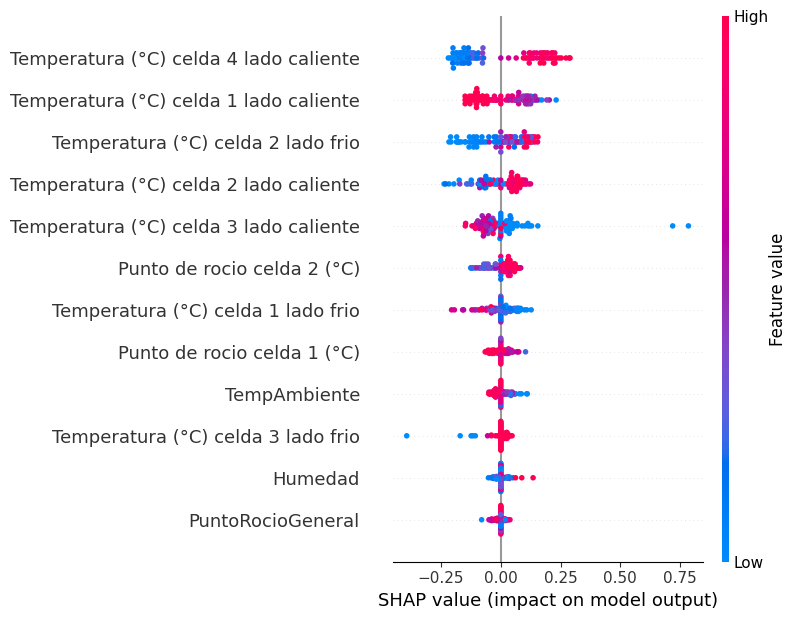

In [37]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Selección de un subconjunto de datos para el análisis SHAP ---
X_sample = X_test_scaled[:100]
feature_names = X.columns.tolist()
X_sample_df = pd.DataFrame(X_sample, columns=feature_names)

# --- Definición de función de predicción ---
def model_predict(X_array):
    return model.predict(X_array).flatten()

# --- Inicialización del explainer ---
explainer = shap.KernelExplainer(model_predict, X_sample_df)

# --- Cálculo de los valores SHAP ---
shap_values = explainer.shap_values(X_sample_df, nsamples=100)

# --- Visualización de resumen SHAP ---
plt.figure()
shap.summary_plot(shap_values, X_sample_df, feature_names=feature_names)